## Question 2

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt

In [21]:
df= pd.read_csv(('gender_feature_vectors.csv'),index_col=0)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

First 399 are male category
Next 401 are male category

In [22]:
df=df*10000
print(df.shape)
df.head(401)

(800, 128)


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1,-664.19959,1516.11447,277.39607,527.70555,-661.04963,-412.32228,-26.37491,-1584.66667,1304.66834,-448.72317,...,259.89352,-10.87022,272.60248,-467.53619,-1186.19218,-1637.74058,-5.90186,-764.00161,1074.97230,15.66540
2,-306.13856,496.66520,80.83738,-503.23568,76.49306,-638.18008,-195.30300,-1199.05055,1865.53150,-448.21102,...,442.28636,-238.99905,-281.07917,406.17973,-1465.78565,-1412.43964,161.61639,176.38400,806.09657,-159.29665
3,-961.77682,611.26690,353.26038,-353.88201,-907.28119,-186.34144,-243.14573,-1397.85841,522.10610,-520.85493,...,1111.40914,594.35967,-292.22304,421.15204,-2221.73139,-1169.07775,934.28336,173.91473,576.51997,861.16344
4,-1030.57027,850.43512,783.32767,-358.73279,-281.62964,49.24194,78.28606,-170.15841,1149.06780,-562.67440,...,1007.93056,-26.43529,-233.88058,294.97493,-1398.30381,-1192.43421,53.05942,-151.00250,1615.75377,624.62494
5,-1258.15049,1200.45893,231.31274,-429.01006,382.14993,-496.76508,-542.58350,-1307.58137,1734.57026,-118.89388,...,901.96997,675.27123,399.25553,474.68532,-568.52028,-767.00419,49.65664,281.70791,260.41389,841.35175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,-1584.60408,1099.47540,190.87646,155.06018,-696.68218,323.11093,150.61509,-1408.17016,1411.32370,-367.36101,...,1434.52629,596.08385,-68.24113,567.57592,-643.51834,-1085.18042,1320.37297,503.47116,714.65053,-229.54455
398,-1014.99282,1197.38773,169.50686,-136.76908,-555.23962,283.99080,281.64148,-1520.99669,1098.13653,-120.78913,...,464.88289,510.43943,-82.98119,180.10424,-1641.96745,-1222.91595,326.15762,-301.93698,-186.42161,328.20672
399,-1495.15584,815.88000,907.95673,-531.16299,-1333.13820,10.95610,199.41203,-1178.03350,1023.19576,-974.26154,...,1116.78444,-169.20781,591.14952,-78.10120,-968.23722,-794.15023,-154.87115,-754.69807,624.80584,527.27219
400,398.43969,703.56630,1301.96080,-76.82588,-778.24667,-212.97958,-241.32527,-851.04927,712.88377,-1212.56039,...,1055.09914,819.27530,-333.37470,-236.04408,-1670.03065,-590.75333,530.74237,809.40448,114.67212,-219.99266


In [24]:
# splitting into train and test data
test_male = df[:10].to_numpy()
test_female = df[399:409].to_numpy()
train_male = df[10:399].to_numpy()
train_female = df[409:].to_numpy()

In [25]:
mean_male = np.mean(train_male,axis=0)
mean_female = np.mean(train_female,axis=0)

In [26]:
# calculating within class scatter matrix
S_W = np.zeros((128,128))
class_sc_mat = np.zeros((128,128))

for row in train_male:
    row, mv = row.reshape(128,1), mean_male.reshape(128,1) # make column vectors
    class_sc_mat += (row-mv).dot((row-mv).T)
S_W += class_sc_mat                             # sum class scatter matrices

class_sc_mat=np.zeros((128,128))
for row in train_female:
    row, mv = row.reshape(128,1), mean_female.reshape(128,1) # make column vectors
    class_sc_mat += (row-mv).dot((row-mv).T)
S_W += class_sc_mat                             # sum class scatter matrices


In [27]:
# calculating between class scatter matrix
overall_mean = np.mean(np.concatenate((train_male,train_female), axis=0), axis=0)
overall_mean = np.asarray(overall_mean)
overall_mean = overall_mean.reshape(128,1)
S_B = np.zeros((128,128))

n1 = train_male.shape[0]
n2 = train_female.shape[0]

mean_vec = np.asarray(mean_male)
mean_vec = mean_vec.reshape(128,1) # make column vector
 # make column vector
z = mean_vec - overall_mean
A = n1 * (np.matmul(z,z.T))
S_B = np.add(S_B,A)


mean_vec = np.asarray(mean_female)
mean_vec = mean_vec.reshape(128,1)
z = mean_vec - overall_mean
A = n2 * (np.matmul(z,z.T))
S_B = np.add(S_B,A)


Eigen pairs

In [28]:
Sw_inv = np.linalg.inv(S_W)
#print(Sw_inv)
M = Sw_inv @ S_B

In [32]:
eig_vals, eig_vecs = np.linalg.eig(M)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

eigv_sum = sum(eig_vals)
tot = 0
for i,j in enumerate(eig_pairs):
    tot += (j[0]/eigv_sum).real
    if(tot > 0.9):
        break

In [33]:
eigen_values , eigen_vectors = eig_vals, eig_vecs
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

#print(sum(eigen_values))
sorted_eigenvalue = eigen_values[sorted_index].astype(np.float64)

#We chose only 1
W = sorted_eigenvectors[:,0:1].astype(np.float64)
print(W.shape)

(128, 1)


/home/sinduja/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
/home/sinduja/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [34]:
X_train=np.concatenate((train_male,train_female),axis=0)
X_reduced=X_train @ W

In [35]:
# let male be 1 and female be 2
y = [1 for i in range(389)]+[2 for i in range(391)]
y = np.array(y)

In [36]:
classifier=GaussianNB()
classifier.fit(X_reduced.reshape(780,1),y)

GaussianNB()

In [37]:
correct=0
cases=0
predicted=[]
for row in test_male:
    prediction = classifier.predict((row @ W).reshape(1,1))
    cases+=1
    predicted.append(prediction[0])
    if(prediction[0]==1):
        correct+=1
        print("Actual : Male Predicted : Male")
    else:
        print("Actual : Male Predicted : Female")
for row in test_female:
    prediction = classifier.predict((row @ W).reshape(1,1))
    cases+=1
    predicted.append(prediction[0])
    if(prediction[0]==2):
        correct+=1
        print("Actual : Female Predicted : Female")
    else:
        print("Actual : Female Predicted : Male")

accuracy=correct/cases
print("Accuracy:",accuracy)

Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Female
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Male Predicted : Male
Actual : Female Predicted : Male
Actual : Female Predicted : Male
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Actual : Female Predicted : Female
Accuracy: 0.85


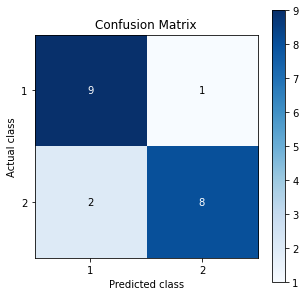

In [38]:
expected=[1 for i in range(10)]+[2 for i in range(10)]
skplt.metrics.plot_confusion_matrix(expected, predicted, figsize=(5,5))
plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.savefig("q2_confusion_matrix")
plt.show()